# Proyek Analisis Data: [Air-Quality-Dataset]
- **Nama:** Bagus Satrio Wicaksono
- **Email:** bsatrio121@gmail.com
- **ID Dicoding:** satss121

## Menentukan Pertanyaan Bisnis

- bagaimana fluktuasi perubahan nilai PM10?  
- tanggal berapa nilai PM10 tertinggi di China?
- Bagaimana hubungan antara tingkat PM10 dengan jumlah CO?
- Bagaimana persebaran stasiun pengecekan data yang ada di China?

## Import Semua Packages/Library yang Digunakan

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn
from geopy.geocoders import Nominatim

## Data Wrangling

### Gathering Data

#### masukkan data frame ke file

In [ ]:
data_dir = './data/'

# membaca data csv
df_Aotizhongxin     = pd.read_csv(data_dir + 'PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df_Changping        = pd.read_csv(data_dir + 'PRSA_Data_Changping_20130301-20170228.csv')
df_Dingling         = pd.read_csv(data_dir + 'PRSA_Data_Dingling_20130301-20170228.csv')
df_Dongsi           = pd.read_csv(data_dir + 'PRSA_Data_Dongsi_20130301-20170228.csv')
df_Guanyuan         = pd.read_csv(data_dir + 'PRSA_Data_Guanyuan_20130301-20170228.csv')
df_Gucheng          = pd.read_csv(data_dir + 'PRSA_Data_Gucheng_20130301-20170228.csv')
df_Huairou          = pd.read_csv(data_dir + 'PRSA_Data_Huairou_20130301-20170228.csv')
df_Nongzhanguan     = pd.read_csv(data_dir + 'PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df_Shunyi           = pd.read_csv(data_dir + 'PRSA_Data_Shunyi_20130301-20170228.csv')
df_Tiantan          = pd.read_csv(data_dir + 'PRSA_Data_Tiantan_20130301-20170228.csv')
df_Wanliu           = pd.read_csv(data_dir + 'PRSA_Data_Wanliu_20130301-20170228.csv')
df_Wanshouxigong    = pd.read_csv(data_dir + 'PRSA_Data_Wanshouxigong_20130301-20170228.csv')

# membuat dictionary untuk data tiap kota agar mudah dipanggil
data_city = {'Aotizhongxin': df_Aotizhongxin,
            'Changping': df_Changping,
            'Dingling': df_Dingling,
            'Dongsi': df_Dongsi,
            'Guanyuan': df_Guanyuan,
            'Gucheng': df_Gucheng,
            'Huairou': df_Huairou,
            'Nongzhanguan': df_Nongzhanguan,
            'Shunyi': df_Shunyi,
            'Tiantan': df_Tiantan,
            'Wanliu': df_Wanliu,
            'Wanshouxigong': df_Wanshouxigong}

#### mengecek setiap informasi di seluruh kota di cina

In [38]:
data_city['Aotizhongxin'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [39]:
data_city['Changping'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [40]:
data_city['Dingling'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [41]:
data_city['Dongsi'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [42]:
data_city['Guanyuan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [43]:
data_city['Gucheng'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [44]:
data_city['Huairou'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [45]:
data_city['Nongzhanguan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [46]:
data_city['Shunyi'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [47]:
data_city['Tiantan'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [48]:
data_city['Wanliu'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [49]:
data_city['Wanshouxigong'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- semua data frame memiliki 18 kolom yang sama
- data frame memberikan informasi detail mengenai kualitas udara di setiap kota
- terdapat 12 kota dengan data kualitas air

### Assessing Data

#### mengecek informasi dari setiap dataset

In [50]:
for df_name, df in data_city.items():
  print('\n', data_city[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entri

##### Cek duplikasi data

In [51]:
# membuat variable untuk mengetahui duplikasi data
duplicate_counts = {}
total_sample_counts = {}

# kalkulasi jumlah data duplikasi dan total data
for df_name, df in data_city.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)

# membuat dataframe yang berisi jumlah data duplikasi dan total data
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# menggabungkan kedua dataframe
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
Aotizhongxin,35064,0
Changping,35064,0
Dingling,35064,0
Dongsi,35064,0
Guanyuan,35064,0
Gucheng,35064,0
Huairou,35064,0
Nongzhanguan,35064,0
Shunyi,35064,0
Tiantan,35064,0


##### Cek Data Hilang

In [52]:
# Membuat dictionary untuk menyimpan jumlah nilai kosong per kolom
null_counts = {}

# Loop untuk menghitung nilai kosong per kolom dan total sampel per dataset
for df_name, df in data_city.items():
    # Menghitung jumlah NaN per kolom
    null_counts[df_name] = df.isna().sum()  

# Membuat DataFrame dari dictionary jumlah NaN per kolom
null_counts_df = pd.DataFrame.from_dict(null_counts, orient='index')

# Menampilkan hasil
print(null_counts_df)

               No  year  month  day  hour  PM2.5  PM10   SO2   NO2    CO  \
Aotizhongxin    0     0      0    0     0    925   718   935  1023  1776   
Changping       0     0      0    0     0    774   582   628   667  1521   
Dingling        0     0      0    0     0    779   656   730  1234  2012   
Dongsi          0     0      0    0     0    750   553   663  1601  3197   
Guanyuan        0     0      0    0     0    616   429   474   659  1753   
Gucheng         0     0      0    0     0    646   381   507   668  1401   
Huairou         0     0      0    0     0    953   777   980  1639  1422   
Nongzhanguan    0     0      0    0     0    628   440   446   692  1206   
Shunyi          0     0      0    0     0    913   548  1296  1365  2178   
Tiantan         0     0      0    0     0    677   597  1118   744  1126   
Wanliu          0     0      0    0     0    382   284   575  1070  1812   
Wanshouxigong   0     0      0    0     0    696   484   669   754  1297   

           

**Insight:**
- Tidak ada duplikasi data
- Terdapat missing values pada kolom PM2.5
- Terdapat missing values pada kolom PM10
- Terdapat missing values pada kolom SO2
- Terdapat missing values pada kolom NO2
- Terdapat missing values pada kolom CO
- Terdapat missing values pada kolom O3
- Terdapat missing values pada kolom TEMP
- Terdapat missing values pada kolom PRES
- Terdapat missing values pada kolom DEWP
- Terdapat missing values pada kolom RAIN
- Terdapat missing values pada kolom WD
- Terdapat missing values pada kolom WSPM

#### Menambahkan kolom date untuk menunjukkan waktu

In [53]:
for df_name, df in data_city.items():
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

#### mengecek informasi dari setiap dataset

In [54]:
for df_name, df in data_city.items():
  print('\n', data_city[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   year     35064 non-null  int64         
 2   month    35064 non-null  int64         
 3   day      35064 non-null  int64         
 4   hour     35064 non-null  int64         
 5   PM2.5    34139 non-null  float64       
 6   PM10     34346 non-null  float64       
 7   SO2      34129 non-null  float64       
 8   NO2      34041 non-null  float64       
 9   CO       33288 non-null  float64       
 10  O3       33345 non-null  float64       
 11  TEMP     35044 non-null  float64       
 12  PRES     35044 non-null  float64       
 13  DEWP     35044 non-null  float64       
 14  RAIN     35044 non-null  float64       
 15  wd       34983 non-null  object        
 16  WSPM     35050 non-null  float64       
 17  station  35064 non-null  object

### Cleaning Data

#### mencari tahu salah satu dari data frame pada colom PM10

In [55]:
# mencari tahu seberapa penting data yang hilang
df_new = data_city["Aotizhongxin"]
df_new[df_new.PM10.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
204,205,2013,3,9,12,78.0,NaN,10.0,10.0,300.0,68.0,12.4,1004.3,-14.4,0.0,NW,7.9,Aotizhongxin,2013-03-09 12:00:00
2949,2950,2013,7,1,21,85.0,NaN,12.0,79.0,2100.0,4.0,24.0,990.3,23.3,5.7,N,0.6,Aotizhongxin,2013-07-01 21:00:00
3133,3134,2013,7,9,13,52.0,NaN,6.0,50.0,700.0,48.0,23.7,997.9,22.9,2.2,NE,1.4,Aotizhongxin,2013-07-09 13:00:00
4513,4514,2013,9,5,1,24.0,NaN,1.0,35.0,400.0,49.0,17.9,1009.6,17.6,1.1,NNE,1.0,Aotizhongxin,2013-09-05 01:00:00
4706,4707,2013,9,13,2,61.0,NaN,2.0,35.0,500.0,54.0,18.9,1002.3,17.4,0.0,SSW,1.0,Aotizhongxin,2013-09-13 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin,2017-02-21 08:00:00
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin,2017-02-21 11:00:00
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin,2017-02-21 13:00:00
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin,2017-02-27 12:00:00


#### Mengisi data kosong numeric dengan nilai rata-rata

In [56]:
# Mengisi nilai pada kolom numerik yang hilang dengan rata-rata
null_counts = {}

for df_name, df in data_city.items():
    data_city[df_name] = df.fillna(df.mean(numeric_only=True))

# Loop untuk menghitung nilai kosong per kolom dan total sampel per dataset
for df_name, df in data_city.items():
    # Menghitung jumlah NaN per kolom
    null_counts[df_name] = df.isna().sum()  

# Membuat DataFrame dari dictionary jumlah NaN per kolom
null_counts_df = pd.DataFrame.from_dict(null_counts, orient='index')

# Menampilkan hasil
print(null_counts_df)

               No  year  month  day  hour  PM2.5  PM10  SO2  NO2  CO  O3  \
Aotizhongxin    0     0      0    0     0      0     0    0    0   0   0   
Changping       0     0      0    0     0      0     0    0    0   0   0   
Dingling        0     0      0    0     0      0     0    0    0   0   0   
Dongsi          0     0      0    0     0      0     0    0    0   0   0   
Guanyuan        0     0      0    0     0      0     0    0    0   0   0   
Gucheng         0     0      0    0     0      0     0    0    0   0   0   
Huairou         0     0      0    0     0      0     0    0    0   0   0   
Nongzhanguan    0     0      0    0     0      0     0    0    0   0   0   
Shunyi          0     0      0    0     0      0     0    0    0   0   0   
Tiantan         0     0      0    0     0      0     0    0    0   0   0   
Wanliu          0     0      0    0     0      0     0    0    0   0   0   
Wanshouxigong   0     0      0    0     0      0     0    0    0   0   0   

           

#### Mengisi data kosong kategorikal dengan nilai yang sering muncul  

In [57]:
# Mengisi nilai pada kolom numerik yang hilang dengan rata-rata
null_counts = {}

# Mengisi nilai yang hilang pada kolom dengan tipe data object menggunakan modus
for df_name, df in data_city.items():
    for column in df.select_dtypes(include=['object']).columns:
        mode_value = df[column].mode()[0]
        df.loc[:, column] = df[column].fillna(mode_value)  # Tidak menggunakan inplace=True

# Loop untuk menghitung nilai kosong per kolom dan total sampel per dataset
for df_name, df in data_city.items():
    null_counts[df_name] = df.isna().sum()  # Menghitung jumlah NaN per kolom

# Membuat DataFrame dari dictionary jumlah NaN per kolom
null_counts_df = pd.DataFrame.from_dict(null_counts, orient='index')

# Menampilkan hasil
print(null_counts_df)


               No  year  month  day  hour  PM2.5  PM10  SO2  NO2  CO  O3  \
Aotizhongxin    0     0      0    0     0      0     0    0    0   0   0   
Changping       0     0      0    0     0      0     0    0    0   0   0   
Dingling        0     0      0    0     0      0     0    0    0   0   0   
Dongsi          0     0      0    0     0      0     0    0    0   0   0   
Guanyuan        0     0      0    0     0      0     0    0    0   0   0   
Gucheng         0     0      0    0     0      0     0    0    0   0   0   
Huairou         0     0      0    0     0      0     0    0    0   0   0   
Nongzhanguan    0     0      0    0     0      0     0    0    0   0   0   
Shunyi          0     0      0    0     0      0     0    0    0   0   0   
Tiantan         0     0      0    0     0      0     0    0    0   0   0   
Wanliu          0     0      0    0     0      0     0    0    0   0   0   
Wanshouxigong   0     0      0    0     0      0     0    0    0   0   0   

           

#### Mengecek hasil dari data cleaning

In [58]:
for df_name, df in data_city.items():
  print(df_name,'\n', data_city[df_name].describe(),'\n')

Aotizhongxin 
                  No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
min        3.000000      2.000000   

**Insight:**
- Data kosong bertipe numerik dapat diisi dengan rata-rata pada kolomnya
- data kosong bertipe kategorikal dapat diisi dengan nilai yang sering muncul pada kolomnya
- terdapat nilai yang outlier seperti pada colom PM10, namun tetap dibiarkan karena nilai tersebut benar dan bisa saja muncul

## Exploratory Data Analysis (EDA)

#### Eksplorasi semua kota hubungan antara PM10 dengan tanggal

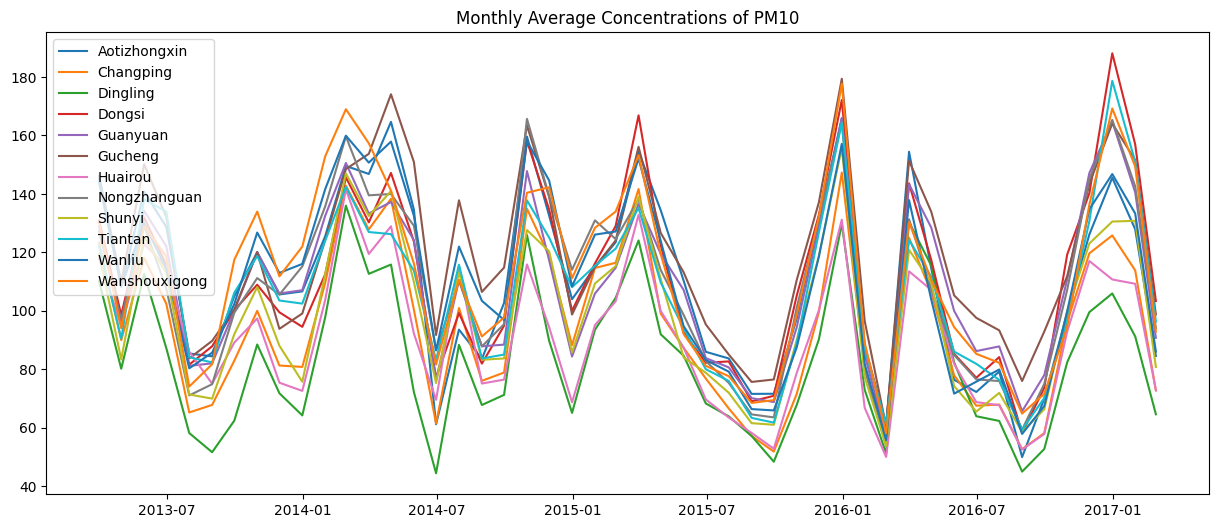

In [59]:
date_data = {}
data_time_series = {}

for df_name, df in data_city.items():
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    date_data[df_name] = df['date']
    data_time_series[df_name] = df[['date', 'PM10']].set_index('date').resample('ME').mean()

plt.figure(figsize=(15, 6))
for df_name, df in data_time_series.items():
    plt.plot(df.index, df['PM10'], label=df_name)

plt.title('Monthly Average Concentrations of PM10')
plt.legend()
plt.show()


#### mencari tahu tanggal yang memiliki nilai PM10 tertinggi

In [60]:
max_pm10_dates = {}

for df_name, df in data_time_series.items():
    max_pm10_value = df['PM10'].max()  # Cari nilai maksimum PM10
    max_date = df[df['PM10'] == max_pm10_value].index[0]  # Cari tanggal yang sesuai

    max_pm10_dates[df_name] = {'Date': max_date, 'Max PM10': max_pm10_value}

# Membuat DataFrame dari hasil pencarian
max_pm10_df = pd.DataFrame.from_dict(max_pm10_dates, orient='index')

# Menampilkan hasil
print(max_pm10_df)


                    Date    Max PM10
Aotizhongxin  2015-12-31  165.851537
Changping     2015-12-31  147.334536
Dingling      2014-02-28  136.008133
Dongsi        2016-12-31  188.118732
Guanyuan      2015-12-31  165.969305
Gucheng       2015-12-31  179.400212
Huairou       2014-02-28  141.614632
Nongzhanguan  2014-10-31  165.689277
Shunyi        2015-12-31  155.765850
Tiantan       2016-12-31  178.703935
Wanliu        2014-02-28  159.937244
Wanshouxigong 2015-12-31  177.742281


#### mencari rata-rata tanggal saat PM10 tinggi pada setiap kota

In [61]:
# Konversi kolom 'Date' menjadi datetime
max_pm10_df['Date'] = pd.to_datetime(max_pm10_df['Date'])

# Menghitung rata-rata tanggal
average_date = max_pm10_df['Date'].mean()
average_PM10 = max_pm10_df['Max PM10'].mean()

# Menampilkan hasil
print("Tanggal rata-rata dari nilai PM10 tertinggi:", average_date)
print("Dengan Nilai rata-rata PM10 sebesar:", average_PM10)


Tanggal rata-rata dari nilai PM10 tertinggi: 2015-08-10 18:00:00
Dengan Nilai rata-rata PM10 sebesar: 163.5113060918786


#### mencari tahu korelasi dari salah satu kota di china

In [62]:
korelasi = data_city["Aotizhongxin"][['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
korelasi

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.874106,0.476459,0.676869,0.755576,-0.158215,-0.127450,-0.005633,0.118144,-0.013967,-0.274121
PM10,0.874106,1.000000,0.464530,0.646959,0.657512,-0.137669,-0.109730,-0.035139,0.060867,-0.027771,-0.180910
SO2,0.476459,0.464530,1.000000,0.429743,0.530065,-0.196622,-0.345086,0.200871,-0.278023,-0.041601,-0.111625
NO2,0.676869,0.646959,0.429743,1.000000,0.675436,-0.491918,-0.237127,0.080223,0.066237,-0.040021,-0.484607
CO,0.755576,0.657512,0.530065,0.675436,1.000000,-0.317620,-0.355826,0.208129,-0.095091,-0.016658,-0.277853
O3,-0.158215,-0.137669,-0.196622,-0.491918,-0.317620,1.000000,0.574514,-0.413936,0.288404,0.024582,0.333641
TEMP,-0.127450,-0.109730,-0.345086,-0.237127,-0.355826,0.574514,1.000000,-0.827133,0.823099,0.036601,0.037907
PRES,-0.005633,-0.035139,0.200871,0.080223,0.208129,-0.413936,-0.827133,1.000000,-0.776384,-0.060403,0.071310
DEWP,0.118144,0.060867,-0.278023,0.066237,-0.095091,0.288404,0.823099,-0.776384,1.000000,0.080789,-0.305011
RAIN,-0.013967,-0.027771,-0.041601,-0.040021,-0.016658,0.024582,0.036601,-0.060403,0.080789,1.000000,0.022471


**Insight:**
- setiap kota memiliki bentuk grafik yang hampir sama pada perubahan nilai PM10 pada setiap bulan
- Setiap kota memiliki PM10 tinggi pada tanggal yang hampir berdekatan
- Rata-rata tanggal pada setiap kota saat PM10 terdapat pada tanggal 2015-08-10 18:00:00
- setiap kota memiliki nilai korelasi yang hampir mirip satu dengan lainnya
- pada kota Aotizhongxin, PM10 memiliki korelasi tinggi ke PM2.5, CO, NO2

## Visualization & Explanatory Analysis

### Pertanyaan 1:
bagaimana fluktuasi perubahan nilai PM10?  

### Pertanyaan 2:
tanggal berapa nilai PM10 tertinggi di China?  

#### membuat data frame baru yang berisi semua data pengecekan udara di China

In [63]:
# Menggabungkan semua data dari dictionary menjadi satu DataFrame
all_data = pd.concat(data_city.values(), ignore_index=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   year     420768 non-null  int64         
 2   month    420768 non-null  int64         
 3   day      420768 non-null  int64         
 4   hour     420768 non-null  int64         
 5   PM2.5    420768 non-null  float64       
 6   PM10     420768 non-null  float64       
 7   SO2      420768 non-null  float64       
 8   NO2      420768 non-null  float64       
 9   CO       420768 non-null  float64       
 10  O3       420768 non-null  float64       
 11  TEMP     420768 non-null  float64       
 12  PRES     420768 non-null  float64       
 13  DEWP     420768 non-null  float64       
 14  RAIN     420768 non-null  float64       
 15  wd       420768 non-null  object        
 16  WSPM     420768 non-null  float64       
 17  station  4

#### mengecek data hasil gabungan

In [64]:
all_data.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,2013-03-01 05:00:00
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin,2013-03-01 06:00:00
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin,2013-03-01 07:00:00
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin,2013-03-01 08:00:00
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin,2013-03-01 09:00:00


#### mendapatkan nilai rata-rata PM10 hasil dari gabungan

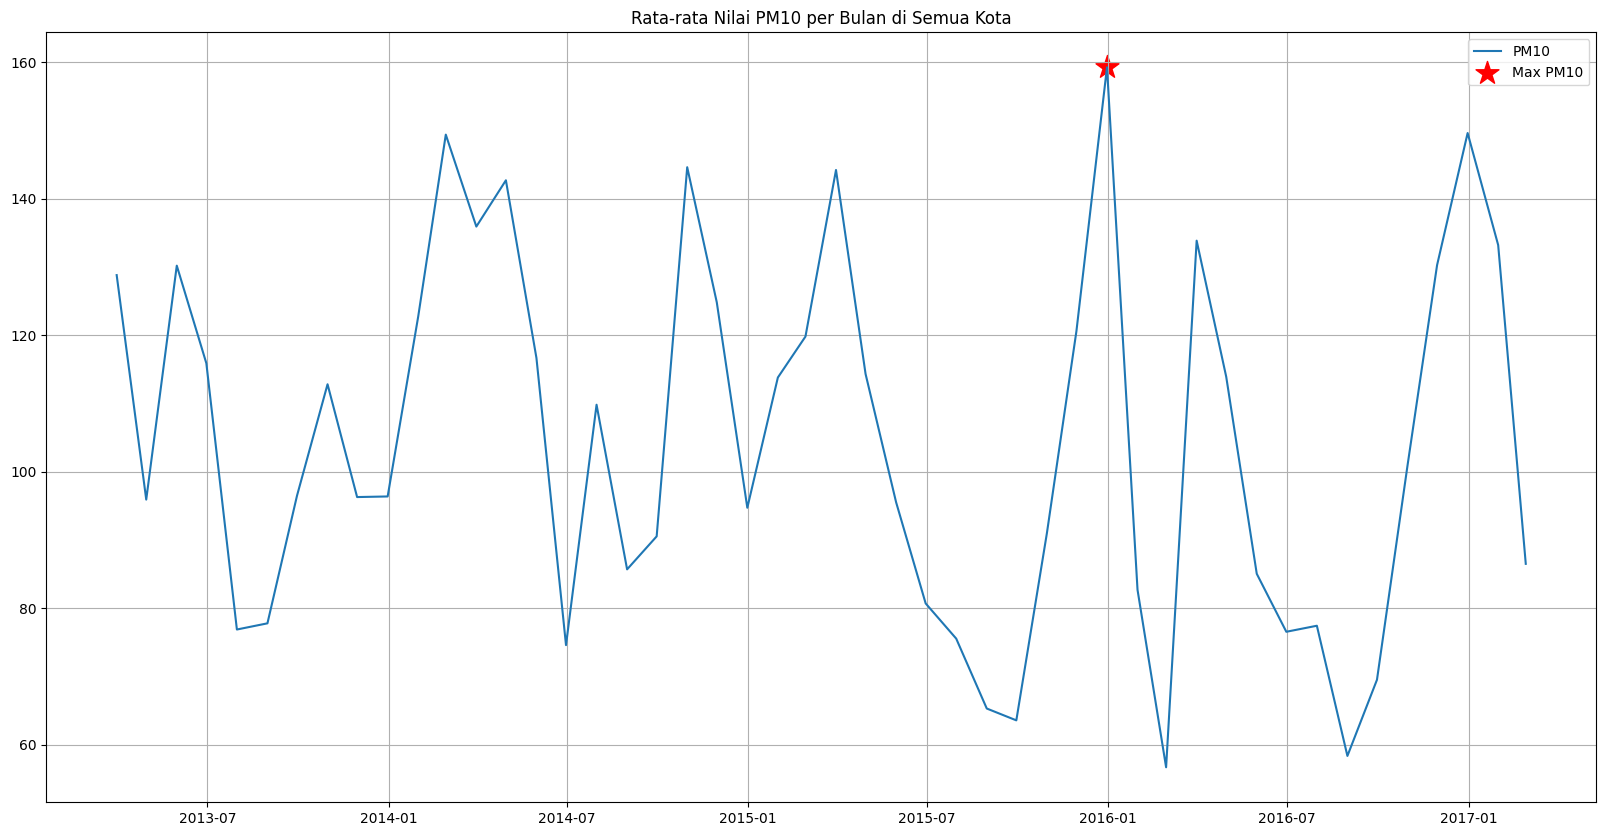

Tanggal PM10 tertinggi: 2015-12-31, dengan nilai PM10: 159.28


In [65]:
# Menghitung rata-rata PM10 untuk semua kota per bulan
data_time_series = all_data[['date', 'PM10']].set_index('date').resample('ME').mean()

# Mencari nilai maksimum PM10 dan tanggalnya
max_pm10_value = data_time_series['PM10'].max()
max_pm10_date = data_time_series['PM10'].idxmax()

# Membuat visualisasi
plt.figure(figsize=(20, 10))
plt.plot(data_time_series.index, data_time_series['PM10'], linestyle='-', label='PM10')

# Menandai titik maksimum dengan warna merah
plt.scatter(max_pm10_date, max_pm10_value, color='red', s=300, marker='*', label=f'Max PM10')

# Menambahkan judul dan label
plt.title('Rata-rata Nilai PM10 per Bulan di Semua Kota')
plt.legend()
plt.grid()

# Menampilkan grafik
plt.show()

# Menampilkan tanggal saat PM10 tertinggi
print(f"Tanggal PM10 tertinggi: {max_pm10_date.date()}, dengan nilai PM10: {max_pm10_value:.2f}")


### Pertanyaan 3:
Bagaimana hubungan antara tingkat PM10 dengan jumlah CO?

#### membuat matriks korelasi untuk semua variable numerik

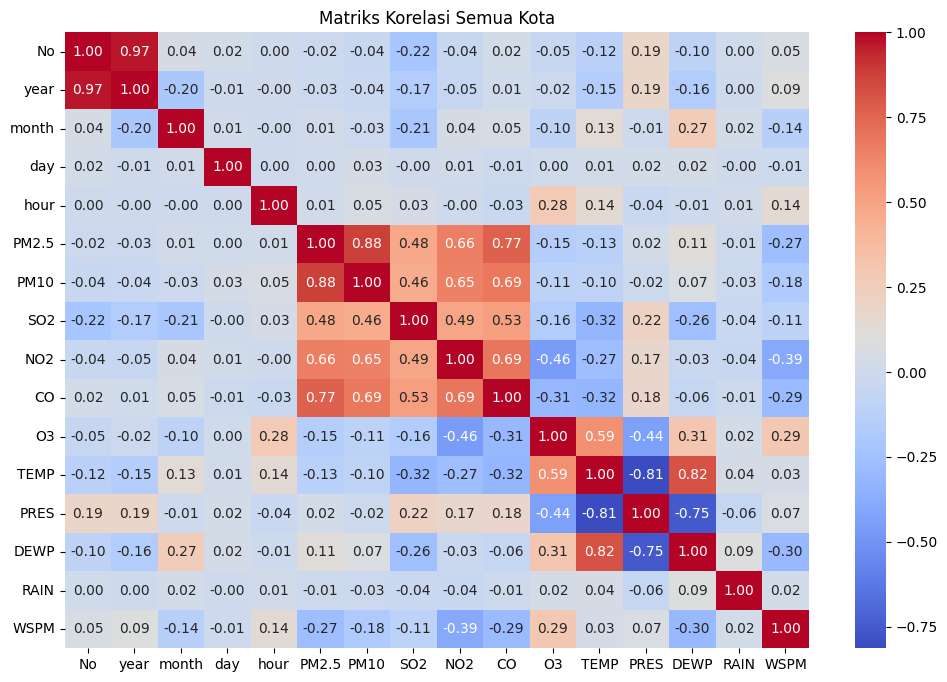

In [66]:
# Memilih hanya kolom numerik
numeric_data = all_data.select_dtypes(include=['number'])

# Menghitung korelasi antar kolom numerik
correlation_matrix = numeric_data.corr()

# Menampilkan hasil
plt.figure(figsize=(12, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi Semua Kota")
plt.show()

### Pertanyaan 4

#### Bagaimana persebaran pengecekan data? 

#### membuat program pengeccekan geografi untuk tempat stasiun pengecekan udara

In [67]:
# Inisialisasi geocoder
geolocator = Nominatim(user_agent="geoapi")

# Fungsi untuk mendapatkan koordinat
def get_coordinates(station_name):
    try:
        location = geolocator.geocode(station_name + ", China")  # Menambahkan "China" agar lebih spesifik
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

# Menghapus duplikasi stasiun agar tidak mengulang pencarian yang sama
unique_stations = all_data[['station']].drop_duplicates()

# Mendapatkan koordinat untuk setiap stasiun (dengan jeda agar tidak diblokir)
unique_stations[['latitude', 'longitude']] = unique_stations['station'].apply(get_coordinates)

# Menggabungkan kembali dengan all_data
all_data = all_data.merge(unique_stations, on="station", how="left", suffixes=('', '_duplicate'))

# Menampilkan hasil
print(all_data[['station', 'latitude', 'longitude']].head())

        station  latitude  longitude
0  Aotizhongxin       NaN        NaN
1  Aotizhongxin       NaN        NaN
2  Aotizhongxin       NaN        NaN
3  Aotizhongxin       NaN        NaN
4  Aotizhongxin       NaN        NaN


#### membuat program untuk menampilkan peta persebaran stasiun pengecekan udara di China

In [70]:
def plot_china_map(data):
    # Path ke file gambar lokal
    image_path = 'E:/2. UKSW/2. Akademik/Semester 11/2. DBS Foundation/3. Materi/1. Machine Learning/8. Belajar Analisis Data dengan Python/submission/'
    image_path = image_path + 'china.jpg'

    # Membaca gambar peta China dari file lokal
    china_map = mpimg.imread(image_path)

    # Membuat scatter plot berdasarkan data geografis
    ax = data.plot(kind="scatter", x="longitude", y="latitude", 
                   figsize=(10,10), alpha=0.3, s=5, c='red')

    # Menyembunyikan sumbu koordinat
    plt.axis('off')

    # Menampilkan gambar peta dengan batas koordinat China
    plt.imshow(china_map, extent=[73, 135, 18, 53])  # Disesuaikan dengan batas geografis China

    # Menampilkan plot
    plt.show()

#### menampilkan peta persebaran data dan ekstraks data hasil analisis

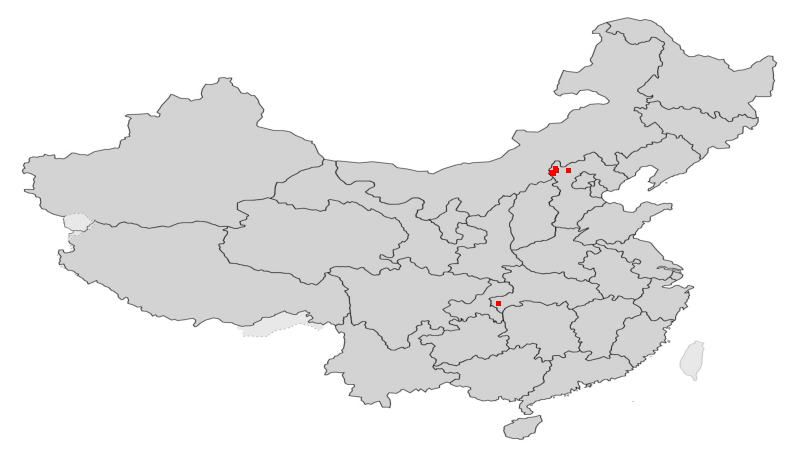

'pipreqs' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:

# Membersihkan data (hapus baris dengan NaN)
all_data = all_data.dropna(subset=['longitude', 'latitude'])

# Menampilkan peta
plot_china_map(all_data)

# export data
all_data.to_csv('data_kualitas_air.csv', index=False)

**Insight:**
- rata-rata nilai PM10 pada semua kota di negara China sangatlah dinamis
- rata-rata nilai tertinggi PM10 berada pada bulan desember tahun 2015
- PM10 memiliki korelasi yang tinggi dengan CO dengan nilai korelasi 0.69 
- semakin tinggi nilai CO makan PM10 juga akan semakin tinggi juga nilainya
- persebaran stasiun pengecekan tidak begitu merata dan hanya berada di tengah cina daratan

## Analisis Lanjutan (Opsional)

perlu adanya evaluasi dan pengecekan lebih lanjut seperti nilai longitute dan latitude yang tidak sesuai dengan wilayah china.
diperlukan juga pengecekan lebih lanjut terhadap data yang memiliki nilai PM10 yang sangat tinggi. 
informasi yang diberikan oleh data sudah sesuai karena sudah melakukan perbaikan data sebelumnya

## Conclusion

- nilai PM10 pada setiap kota yang kita cek memiliki perubahan yang fluktuatif setiap bulannya
- jika diambil rata-rata pada semua kota maka nilai PM10 tertinggi berada di tanggal 31 Desember 2015 dengan nilai PM10 mencapai 159.28
- hubungan CO dengan PM10 sangat tinggi, nilainya mencapai 0.69
- semakin tinggi nilai CO maka PM10 akan semakin tinggi pula
- persebaran pengecekan data tidak begitu merata dan hanya berada di tengah negara Cina Daratan saja